In [302]:
import random
import pandas as pd
import numpy as np 
from tabulate import tabulate

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Experimentando Diferentes conjuntos de dados

## 1.1) Pré-processamento

In [303]:
def config_ravel(y_train, y_test):
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()  

    return y_train_ravel, y_test_ravel

## 1.2) Carregar os dados de treinamento e teste

In [304]:
X_train_array = []
y_train_array = []
X_test_array = []
y_test_array = []  

def get_data_from_conjunto(conjunto: int):      

    X_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_train.csv')
    y_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_train.csv')
    X_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_test.csv')
    y_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_test.csv')

    num_classes = len(np.unique(y_train))
    input = X_train.shape[1]
    
    y_train, y_test = config_ravel(y_train, y_test)

    X_train_array.append(X_train)
    y_train_array.append(y_train)
    X_test_array.append(X_test)
    y_test_array.append(y_test)

    return num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array

## 1.3) Montando rede

In [305]:
def train_naive_bayes(X_train, y_train):

    model = GaussianNB(var_smoothing=1e-9, priors=[0.4, 0.3, 0.3])

    cv_scores = cross_val_predict(model, X_train, y_train, cv=5)

    model.fit(X_train, y_train)

    # Calculando métricas para cada fold
    accuracy = accuracy_score(y_train, cv_scores)
    f1 = f1_score(y_train, cv_scores, average='weighted')  # 'weighted' para lidar com classes desbalanceadas
    recall_per_class = recall_score(y_train, cv_scores, average=None)  # Revocação por classe
    recall_average = sum(recall_per_class) / len(recall_per_class)  # Média da revocação
    precision_per_class = precision_score(y_train, cv_scores, average=None)  # Precisão por classe
    precision_average = sum(precision_per_class) / len(precision_per_class)  # Média da precisão

    return accuracy, f1, recall_average, precision_average, model

## 1.4) Carregando dados e treinando (Cross validation)

In [306]:
conjuntos = 10
resultados_acuracia = []
resultados_precisao = []
resultados_revocacao = []
resultados_f1 = []
best_models = []

for i in range(conjuntos):
    print(f'\nConjunto {i + 1}')
    num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array = get_data_from_conjunto(i)

    media_accuracy, media_f1, media_recall, media_precision, model = train_naive_bayes(X_train_array[i], y_train_array[i])

    print(f'Acurácia: {media_accuracy}')
    print(f'F1: {media_f1}')
    print(f'Revocação: {media_recall}')
    print(f'Precisão: {media_precision}')

    resultados_acuracia.append(media_accuracy)
    resultados_precisao.append(media_precision)
    resultados_revocacao.append(media_recall)
    resultados_f1.append(media_f1)
    best_models.append(model)


Conjunto 1
Acurácia: 0.9514285714285714
F1: 0.9513476352198135
Revocação: 0.9504804145565799
Precisão: 0.9476803513507114

Conjunto 2
Acurácia: 0.9414285714285714
F1: 0.9413319476980002
Revocação: 0.9391349198478972
Precisão: 0.9318736041903838

Conjunto 3
Acurácia: 0.9414285714285714
F1: 0.9415199536262155
Revocação: 0.9447256099507322
Precisão: 0.9317005842741137

Conjunto 4
Acurácia: 0.9471428571428572
F1: 0.9475921590815676
Revocação: 0.9510903472994685
Precisão: 0.9348386343828361

Conjunto 5
Acurácia: 0.9171428571428571
F1: 0.9178321718931475
Revocação: 0.9220785867436336
Precisão: 0.9009719333795481

Conjunto 6
Acurácia: 0.9542857142857143
F1: 0.9544606192038725
Revocação: 0.9534192400387766
Precisão: 0.9457146270254256

Conjunto 7
Acurácia: 0.9271428571428572
F1: 0.927341601290937
Revocação: 0.9250801945302172
Precisão: 0.9156846240179574

Conjunto 8
Acurácia: 0.9371428571428572
F1: 0.9371354141848418
Revocação: 0.9352902296540889
Precisão: 0.9284990869830428

Conjunto 9
Acurá

## 1.5) Analisando resultados gerais

In [307]:
# Calculate the overall mean
overall_mean_acuracia = sum(resultados_acuracia) / len(resultados_acuracia)
overall_mean_precisao = sum(resultados_precisao) / len(resultados_precisao)
overall_mean_revocacao = sum(resultados_revocacao) / len(resultados_revocacao)
overall_mean_f1 = sum(resultados_f1) / len(resultados_f1)

# Create a DataFrame
data = {
    'Acurácia': [overall_mean_acuracia],
    'Precisão': [overall_mean_precisao],
    'Revocação': [overall_mean_revocacao],
    'F1-Score': [overall_mean_f1]
}

df = pd.DataFrame(data)

# Display the table
print(df)

   Acurácia  Precisão  Revocação  F1-Score
0     0.939  0.929629   0.940346  0.939166


## 1.6) Matriz de confusao e resultados da predição

----------------------------------------------------------------
Eficácia do conjunto 1


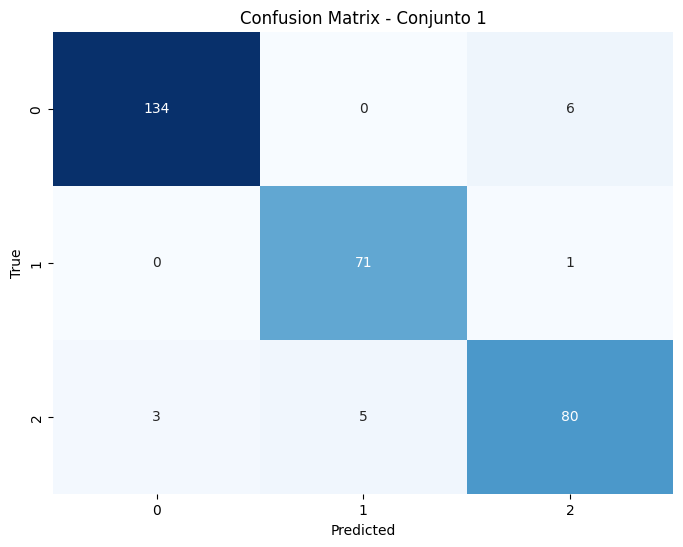

Acurácia no conjunto de teste: 95.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.98      0.96      0.97       140
         Mal       0.93      0.99      0.96        72
       Medio       0.92      0.91      0.91        88

    accuracy                           0.95       300
   macro avg       0.94      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 2


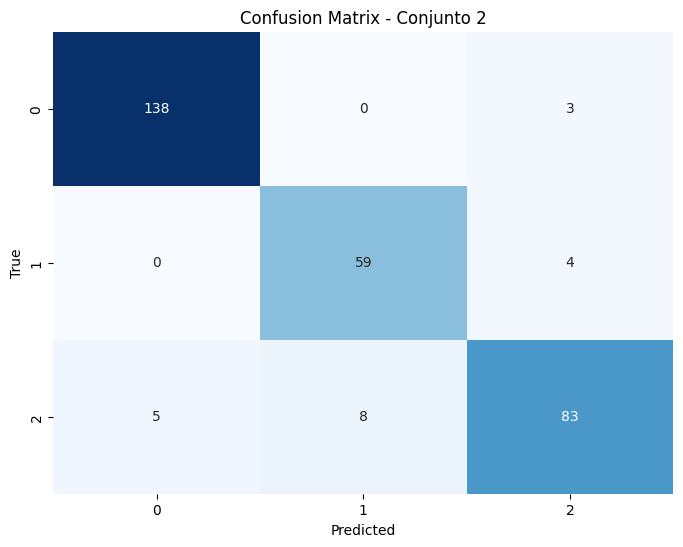

Acurácia no conjunto de teste: 93.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.97      0.98      0.97       141
         Mal       0.88      0.94      0.91        63
       Medio       0.92      0.86      0.89        96

    accuracy                           0.93       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.93      0.93       300


----------------------------------------------------------------

Eficácia do conjunto 3


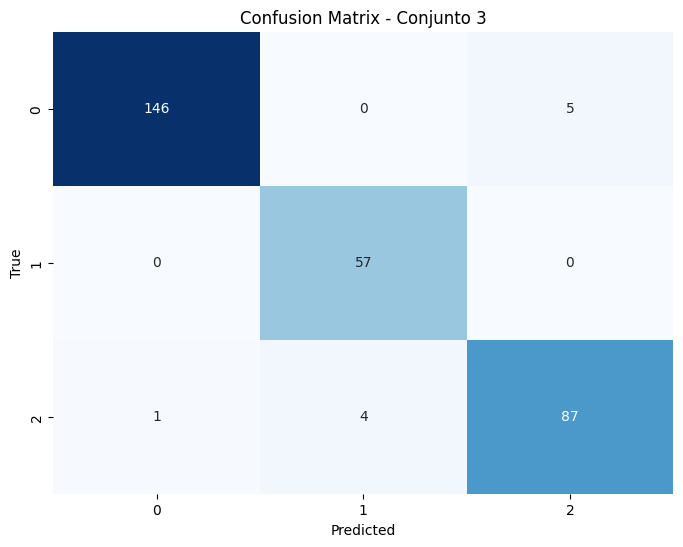

Acurácia no conjunto de teste: 96.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.99      0.97      0.98       151
         Mal       0.93      1.00      0.97        57
       Medio       0.95      0.95      0.95        92

    accuracy                           0.97       300
   macro avg       0.96      0.97      0.96       300
weighted avg       0.97      0.97      0.97       300


----------------------------------------------------------------

Eficácia do conjunto 4


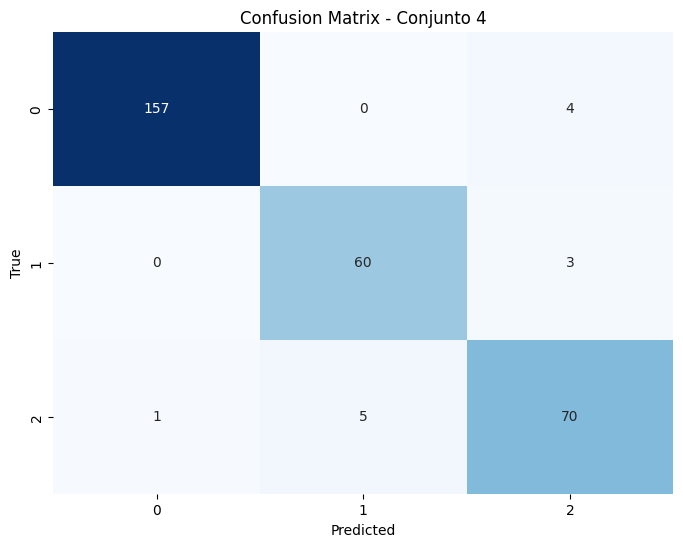

Acurácia no conjunto de teste: 95.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.99      0.98      0.98       161
         Mal       0.92      0.95      0.94        63
       Medio       0.91      0.92      0.92        76

    accuracy                           0.96       300
   macro avg       0.94      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 5


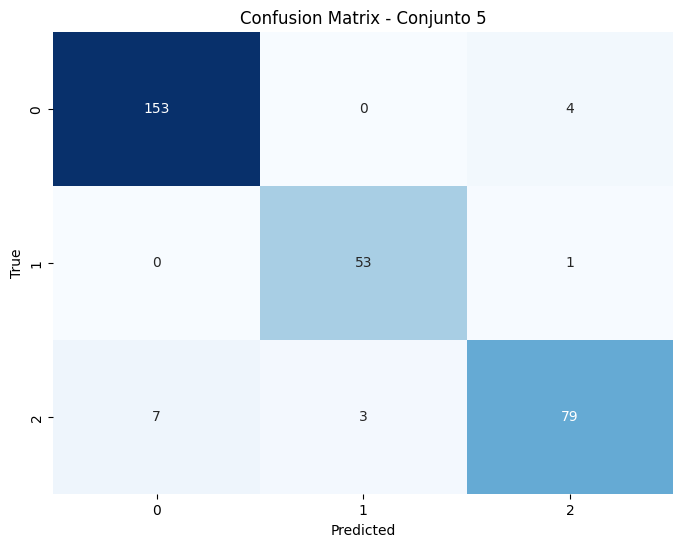

Acurácia no conjunto de teste: 95.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.96      0.97      0.97       157
         Mal       0.95      0.98      0.96        54
       Medio       0.94      0.89      0.91        89

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 6


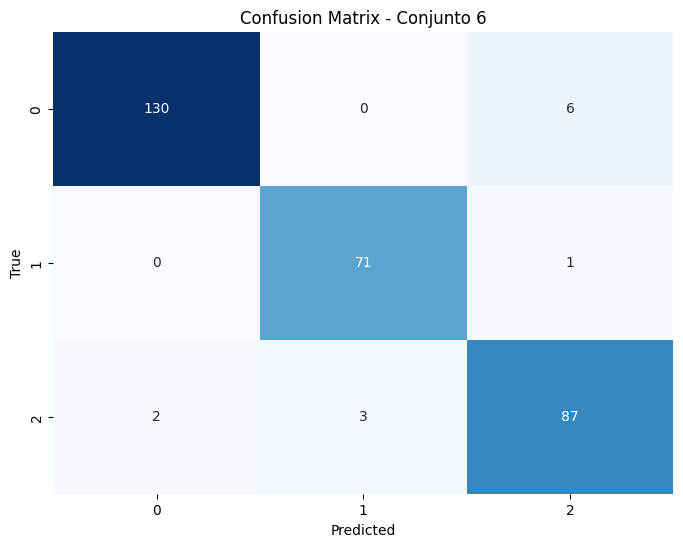

Acurácia no conjunto de teste: 96.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.98      0.96      0.97       136
         Mal       0.96      0.99      0.97        72
       Medio       0.93      0.95      0.94        92

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 7


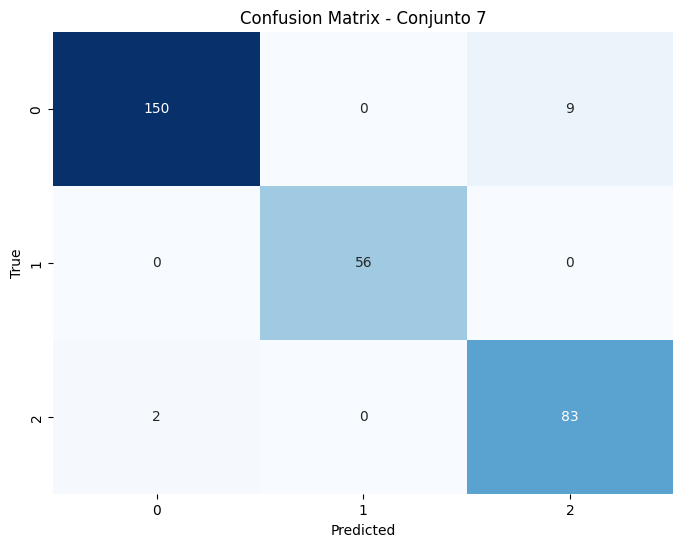

Acurácia no conjunto de teste: 96.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.99      0.94      0.96       159
         Mal       1.00      1.00      1.00        56
       Medio       0.90      0.98      0.94        85

    accuracy                           0.96       300
   macro avg       0.96      0.97      0.97       300
weighted avg       0.97      0.96      0.96       300


----------------------------------------------------------------

Eficácia do conjunto 8


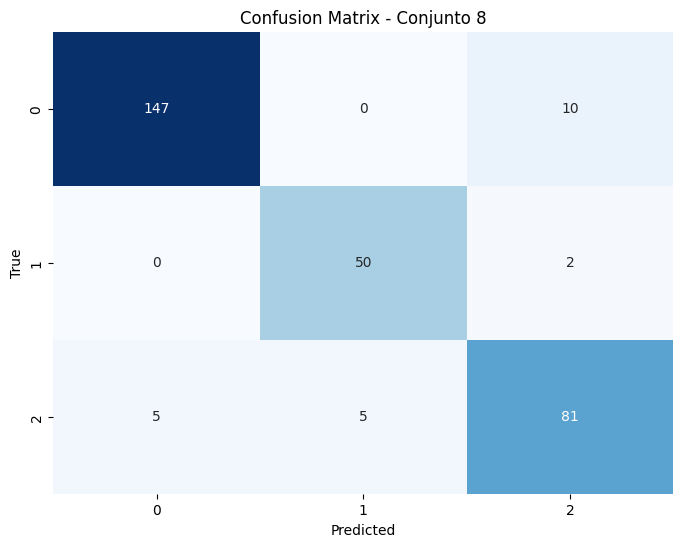

Acurácia no conjunto de teste: 92.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.97      0.94      0.95       157
         Mal       0.91      0.96      0.93        52
       Medio       0.87      0.89      0.88        91

    accuracy                           0.93       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.93      0.93       300


----------------------------------------------------------------

Eficácia do conjunto 9


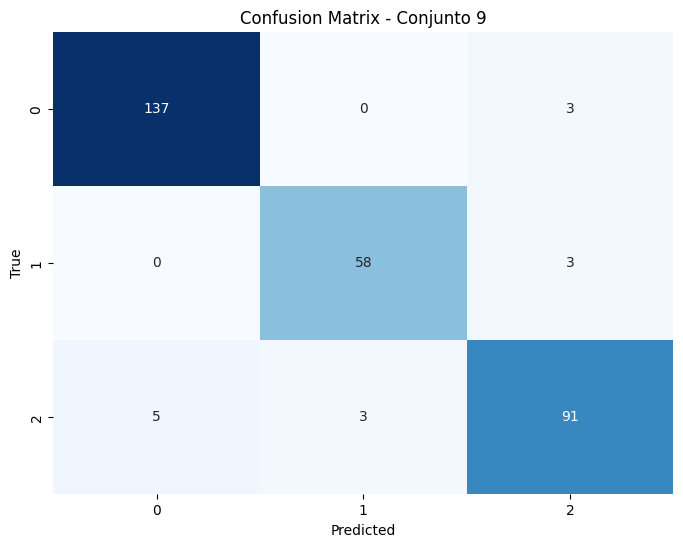

Acurácia no conjunto de teste: 95.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.96      0.98      0.97       140
         Mal       0.95      0.95      0.95        61
       Medio       0.94      0.92      0.93        99

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


----------------------------------------------------------------

Eficácia do conjunto 10


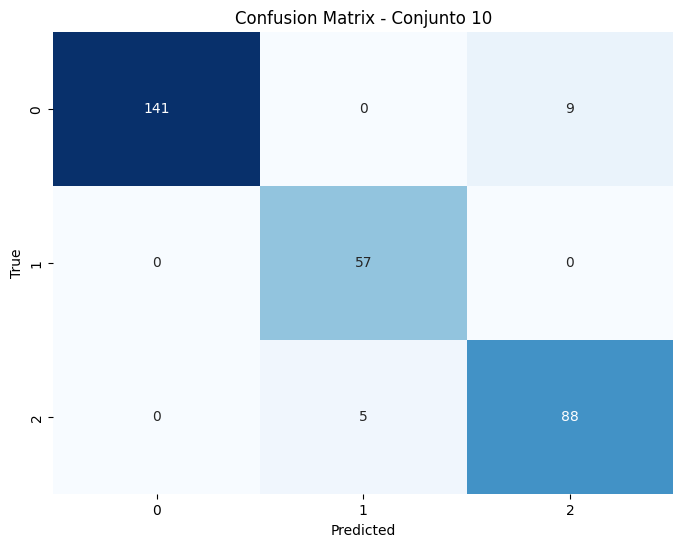

Acurácia no conjunto de teste: 95.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       1.00      0.94      0.97       150
         Mal       0.92      1.00      0.96        57
       Medio       0.91      0.95      0.93        93

    accuracy                           0.95       300
   macro avg       0.94      0.96      0.95       300
weighted avg       0.96      0.95      0.95       300


----------------------------------------------------------------



In [308]:
print("----------------------------------------------------------------")
# List to store average accuracies for each conjunto
average_accuracies = []
for i in range(conjuntos):
    print(f'Eficácia do conjunto {i + 1}')
    X_test = X_test_array[i]
    y_test = y_test_array[i]

    # Load the trained model for the current dataset
    naiveBayes = best_models[i]

    # Make predictions on the test set
    y_pred = naiveBayes.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Conjunto {i + 1}')
    plt.show()

      # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    average_accuracies.append(accuracy)
    
    print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%\n')


    # Print classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f'Relatório de Classificação:\n{classification_rep}')
    

    print('\n----------------------------------------------------------------\n')

In [309]:
# Find the index of the conjunto with the highest average accuracy
best_conjunto_index = np.argmax(average_accuracies)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {best_conjunto_index + 1} obteve os melhores resultados.")


O conjunto 3 obteve os melhores resultados.


# 2) Experimentando as melhores configurações de parametros

## OBS: Pegando um conjunto aleatorio entre os 10 


In [310]:
conjunto_aleatorio = random.randint(0, 9)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {conjunto_aleatorio + 1} será utilizado para o teste de parâmetros")


O conjunto 9 será utilizado para o teste de parâmetros


## 2.1) Carregar os dados de treinamento e teste

In [311]:
# MUDAR ISSO -> ESCOLHER UM NUMERO ENTRE 1 A 10 E PEGAR AQUELE CONJUNTO

X_train = X_train_array[conjunto_aleatorio]
y_train = y_train_array[conjunto_aleatorio]
X_test = X_test_array[conjunto_aleatorio]
y_test = y_test_array[conjunto_aleatorio]


## 2.2) Treinando modelo 

In [312]:
param_grid = {
    'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2], [0.4, 0.3, 0.3]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

model = GaussianNB()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2],
                                    [0.4, 0.3, 0.3]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             return_train_score=True, scoring='accuracy')

## 2.3) Analisando todas combinações

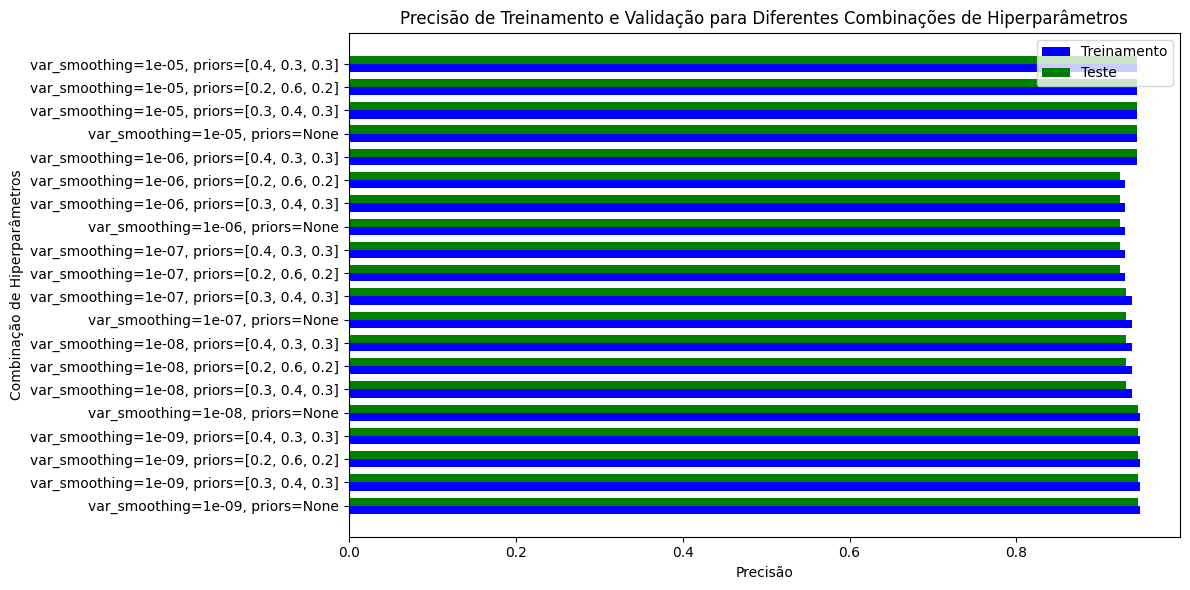

In [313]:
results = grid_search.cv_results_

param_combinations = [f'var_smoothing={var_smoothing}, priors={priors}' 
                      for var_smoothing in param_grid['var_smoothing'] 
                      for priors in param_grid['priors']]

train_scores = results['mean_train_score']

validations_scores = results['mean_test_score']

y_indices = np.arange(len(param_combinations))

bar_height = 0.35

plt.figure(figsize=(12, 6))
plt.barh(y_indices, train_scores, height=bar_height, label='Treinamento', color='b', align='center')
plt.barh(y_indices + bar_height, validations_scores, height=bar_height, label='Teste', color='g', align='center')

plt.ylabel('Combinação de Hiperparâmetros')
plt.xlabel('Precisão')
plt.title('Precisão de Treinamento e Validação para Diferentes Combinações de Hiperparâmetros')
plt.yticks(y_indices + bar_height / 2, param_combinations)
plt.legend()
plt.tight_layout()

plt.show()

## 2.4) Analisando Cada combinação para var_smoothing

In [314]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

### 2.5) Tabela comparativa para todas combinações

In [315]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

# # Crie um DataFrame a partir dos dados da tabela
# df = pd.DataFrame(table_data, columns=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'])

# # Salve o DataFrame em um arquivo CSV
# df.to_csv('resultados.csv', index=False)  # Isso salvará os dados em um arquivo CSV chamado 'resultados.csv'

╒══════════════╤═════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                     │ Train Score   │ Validation Score   │
╞══════════════╪═════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'priors': None, 'var_smoothing': 1e-09}            │ 0.948571      │ 0.945714           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'priors': None, 'var_smoothing': 1e-08}            │ 0.948571      │ 0.945714           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'priors': None, 'var_smoothing': 1e-07}            │ 0.948571      │ 0.945714           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'priors': 

## 2.6) Predição para o melhor modelo

In [316]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

## 2.7) Matriz Confusão

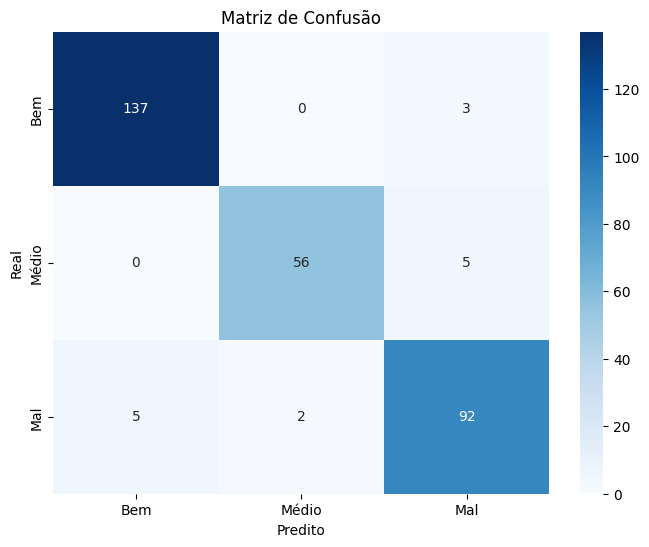

In [317]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 2.8) Métricas de eficácia

In [318]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia do teste: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Precisão: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'priors': None, 'var_smoothing': 1e-09}
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.96      0.98      0.97       140
         Mal       0.97      0.92      0.94        61
       Medio       0.92      0.93      0.92        99

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300

----------------------------------------------------------------

Acurácia do teste: 0.95
Precisão: 0.9501565808644974
Recall: 0.95
Medida F: 0.9499260731413987
